# (A) Dependencies


In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline



import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# (B) Dataset

### Downloading the dataset via kaggle api
- [urbansound8k Kaggle  Dataset](https://www.kaggle.com/datasets/chrisfilo/urbansound8k?datasetId=500970&sortBy=voteCount&select=UrbanSound8K.csv)
- [Meta Data Info](https://urbansounddataset.weebly.com/urbansound8k.html)

In [2]:
# Download kaggle api
!pip install -q kaggle

In [3]:
# Creat the convenient dir for token. (The system will seach this dir)
! mkdir ~/.kaggle

- Upload your kaggle token
- For creating a token
  - Sign in your Kaggle account,
  - Open Account section from  your icon menu
  - Scroll to API section
  -  Click on __Create New API Token__
     - It will download kaggle.json file on your machine. 
  - Upload this kaggle.json file into your working directory on your google colab session.
  - Run floowing codes

In [4]:
# upload your kaggle token to download dataset.
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [5]:
# Copy the json file into correct path, then remove the firt one it
! cp kaggle.json ~/.kaggle/
! rm -f kaggle.json

In [6]:
# Set the token can't readable for other user if you save it somewhere
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Download your data "Competition-name"
#! kaggle competitions download -c 'competition-name'
!!kaggle datasets download -d chrisfilo/urbansound8k

['Downloading urbansound8k.zip to /content',
 '',
 '  0% 0.00/5.61G [00:00<?, ?B/s]',
 '  0% 5.00M/5.61G [00:00<02:17, 43.9MB/s]',
 '  0% 17.0M/5.61G [00:00<01:09, 87.0MB/s]',
 '  1% 33.0M/5.61G [00:00<00:55, 109MB/s] ',
 '  1% 47.0M/5.61G [00:00<00:49, 121MB/s]',
 '  1% 59.0M/5.61G [00:00<01:13, 81.3MB/s]',
 '  1% 78.0M/5.61G [00:00<00:54, 109MB/s] ',
 '  2% 91.0M/5.61G [00:00<00:54, 109MB/s]',
 '  2% 113M/5.61G [00:01<00:43, 137MB/s] ',
 '  2% 129M/5.61G [00:01<00:58, 100MB/s]',
 '  3% 150M/5.61G [00:01<00:49, 120MB/s]',
 '  3% 169M/5.61G [00:01<00:45, 129MB/s]',
 '  3% 185M/5.61G [00:01<00:42, 137MB/s]',
 '  3% 200M/5.61G [00:01<00:42, 136MB/s]',
 '  4% 214M/5.61G [00:01<00:47, 122MB/s]',
 '  4% 233M/5.61G [00:02<00:51, 112MB/s]',
 '  4% 253M/5.61G [00:02<00:43, 132MB/s]',
 '  5% 267M/5.61G [00:02<00:45, 126MB/s]',
 '  5% 281M/5.61G [00:02<00:45, 125MB/s]',
 '  5% 305M/5.61G [00:02<00:36, 155MB/s]',
 '  6% 321M/5.61G [00:02<00:37, 150MB/s]',
 '  6% 337M/5.61G [00:02<00:36, 153MB/s]'

In [8]:
!unzip urbansound8k.zip

Streaming output truncated to the last 5000 lines.
  inflating: fold4/151877-5-1-0.wav  
  inflating: fold4/154758-5-0-0.wav  
  inflating: fold4/154758-5-0-1.wav  
  inflating: fold4/154758-5-0-10.wav  
  inflating: fold4/154758-5-0-11.wav  
  inflating: fold4/154758-5-0-12.wav  
  inflating: fold4/154758-5-0-13.wav  
  inflating: fold4/154758-5-0-14.wav  
  inflating: fold4/154758-5-0-15.wav  
  inflating: fold4/154758-5-0-16.wav  
  inflating: fold4/154758-5-0-17.wav  
  inflating: fold4/154758-5-0-18.wav  
  inflating: fold4/154758-5-0-19.wav  
  inflating: fold4/154758-5-0-2.wav  
  inflating: fold4/154758-5-0-20.wav  
  inflating: fold4/154758-5-0-21.wav  
  inflating: fold4/154758-5-0-3.wav  
  inflating: fold4/154758-5-0-4.wav  
  inflating: fold4/154758-5-0-5.wav  
  inflating: fold4/154758-5-0-6.wav  
  inflating: fold4/154758-5-0-7.wav  
  inflating: fold4/154758-5-0-8.wav  
  inflating: fold4/154758-5-0-9.wav  
  inflating: fold4/155320-3-0-0.wav  
  inflating: fold4/156362

In [9]:
!ls

fold1	fold2  fold4  fold6  fold8  sample_data       urbansound8k.zip
fold10	fold3  fold5  fold7  fold9  UrbanSound8K.csv


## Loading the dataset

In [10]:
raw = pd.read_csv('UrbanSound8K.csv')
df = raw.copy()
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
target_class = "Class"

## Dataset Information

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: 
<li>air_conditioner
<li>car_horn
<li>children_playing
<li>dog_bark
<li>drilling
<li>engine_idling
<li>gun_shot
<li>jackhammer
<li>siren
<li>street_music

## Attributes & Stats of the dataset

In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
# statistical info
df.describe()

,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# (C) Preprocessing the data

## Loading the sample audio

In [ ]:
def path_extractor(df:pd.DataFrame)->str:
  
  # extracting the file path
  folder_path = f"fold{str(df['fold'])}"
  file_path =  str(df["slice_file_name"])

  # converting the path into convenient form
  sound_path = os.path.join(folder_path, file_path)
  return sound_path

In [ ]:
df["file_path"] = df.apply(path_extractor, axis=1)

In [ ]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class,file_path
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,fold5/100032-3-0-0.wav
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,fold5/100263-2-0-117.wav
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,fold5/100263-2-0-121.wav
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,fold5/100263-2-0-126.wav
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,fold5/100263-2-0-137.wav


In [ ]:
ex_path = df["file_path"].iloc[0]

In [ ]:
ipd.Audio(ex_path)

In [ ]:
ex_data, ex_sampling_rate = librosa.load(ex_path)
ex_sampling_rate

22050

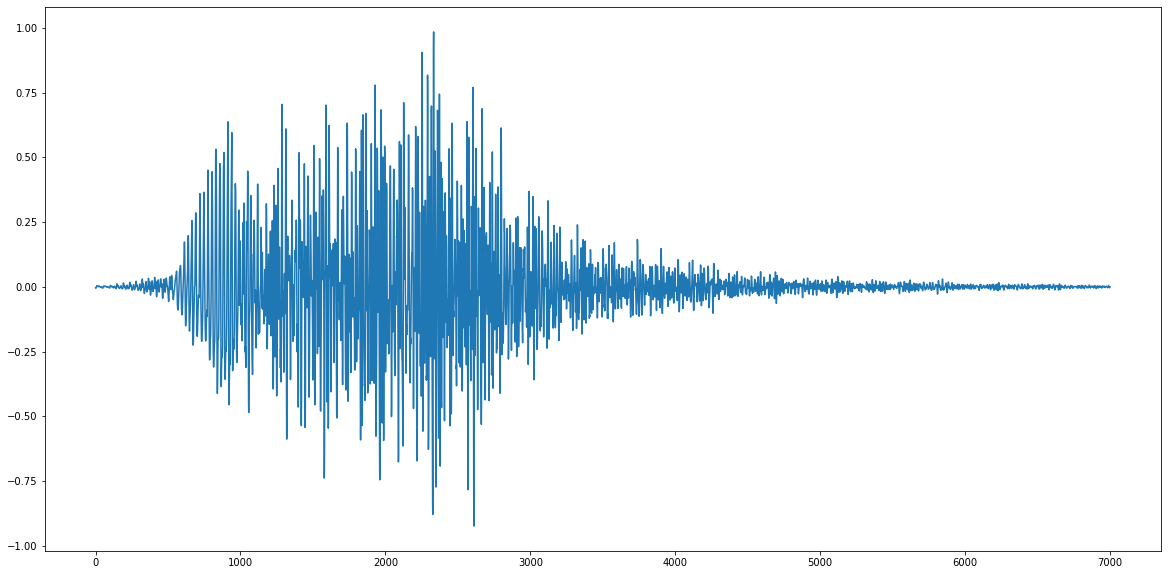

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ex_data);

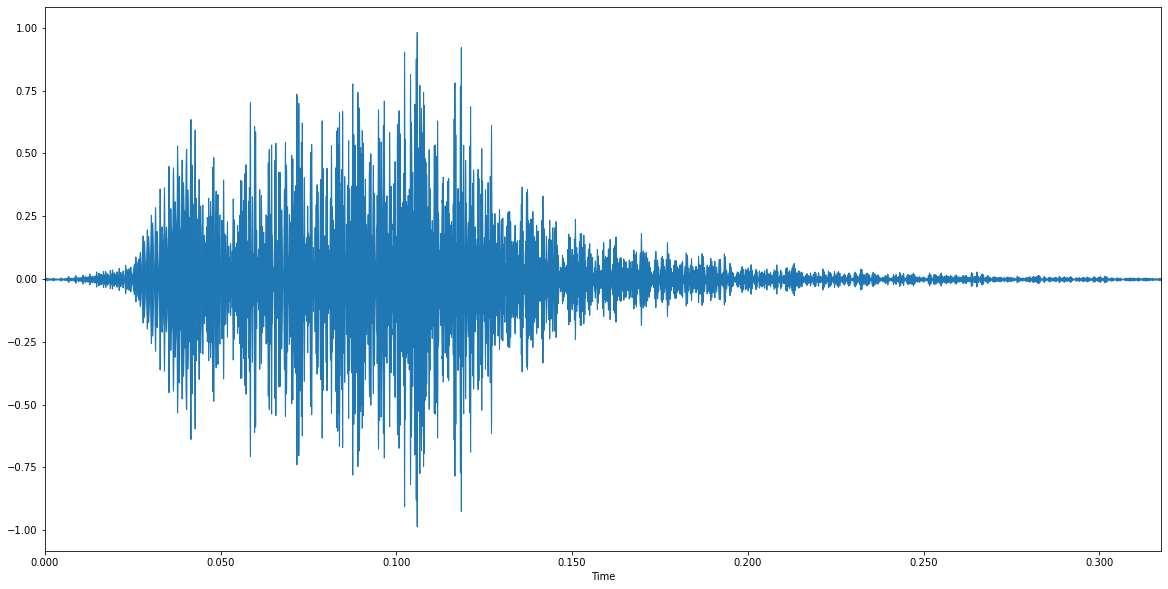

In [ ]:
plt.figure(figsize=(20,10))
librosa.display.waveplot(ex_data, sr=ex_sampling_rate)

## Creating Tidy dataset from audio 

alternative for loading audio data 
```python
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset='both')

label_names = np.array(train_ds.class_names)
```

In [64]:
import os

def converter(row):
  # path of the file
  file_path = row["file_path"]
  label = row["class"]

  # load the audio file
  x, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
  
  # feature extracting (mfccs is an aduio feature)
  mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)
  feature = mfccs
  
  return [feature, label]

In [65]:
tidy_data = df.apply(converter, axis=1)
tidy_data.columns = ['feature','label']

# (D) Exploratory Data Analysis

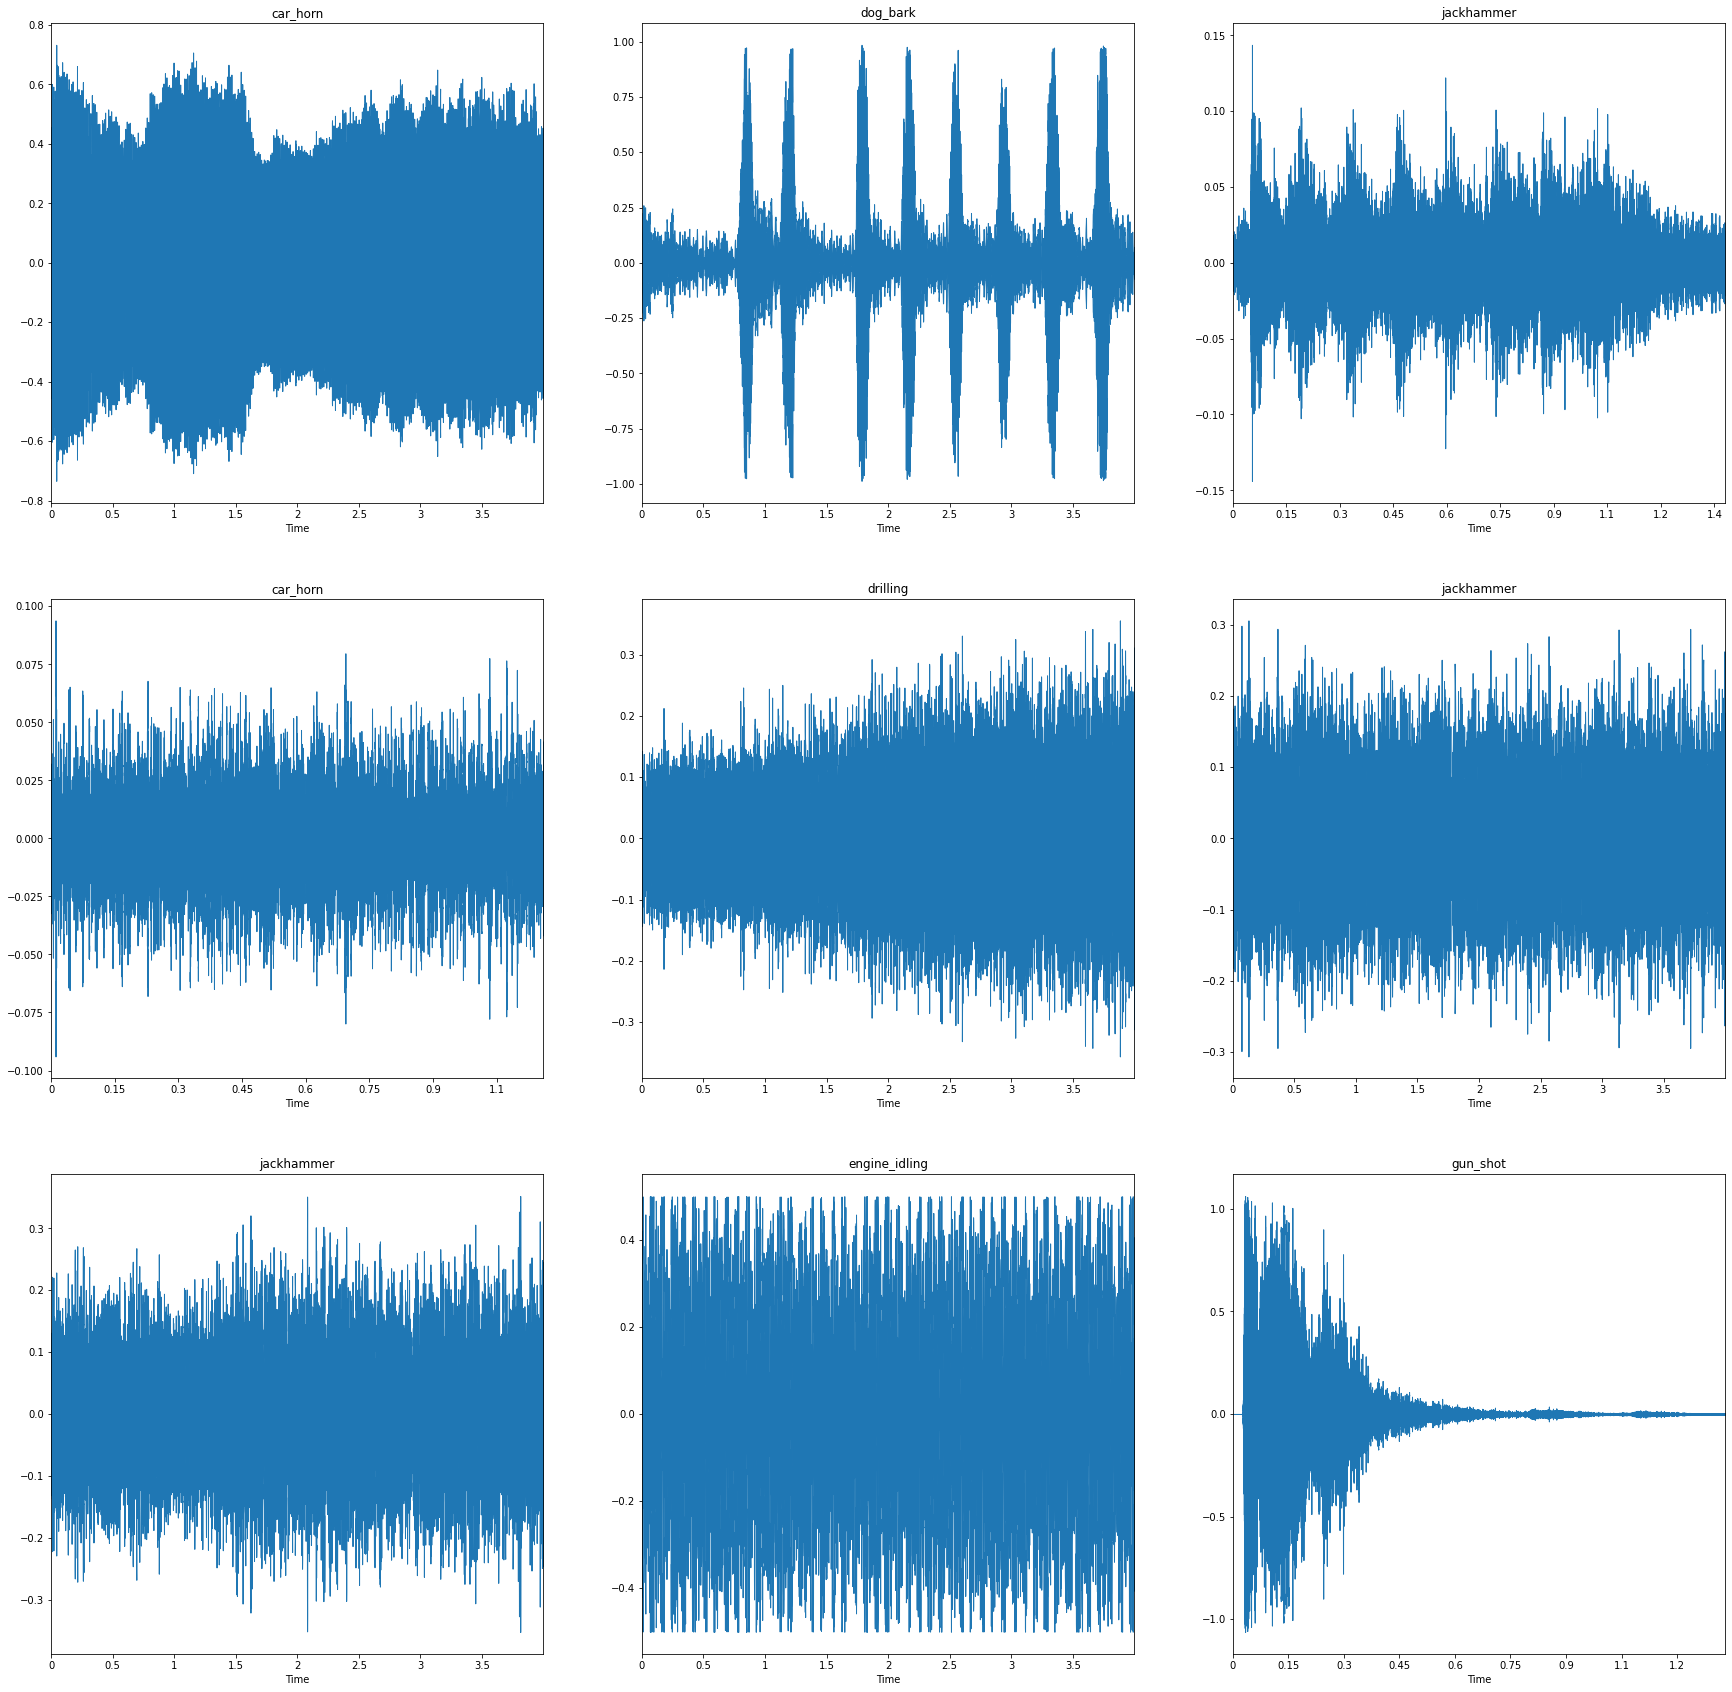

In [54]:
rs, cs = 3,3
plt.figure(figsize=(cs*10,rs*10))
for i in range(9):

  # Selectin a observation randomly
  index = random.choice(df.index)
  random_data = df["file_path"][index]
  sound_class = str(df["class"][index])

  # Loading the data
  data, sampling_rate = librosa.load(random_data)

  # Displaying the data
  plt.subplot(rs, cs, i+1)
  librosa.display.waveplot(data, sr=sampling_rate);
  plt.title(sound_class)

<AxesSubplot:xlabel='class', ylabel='count'>

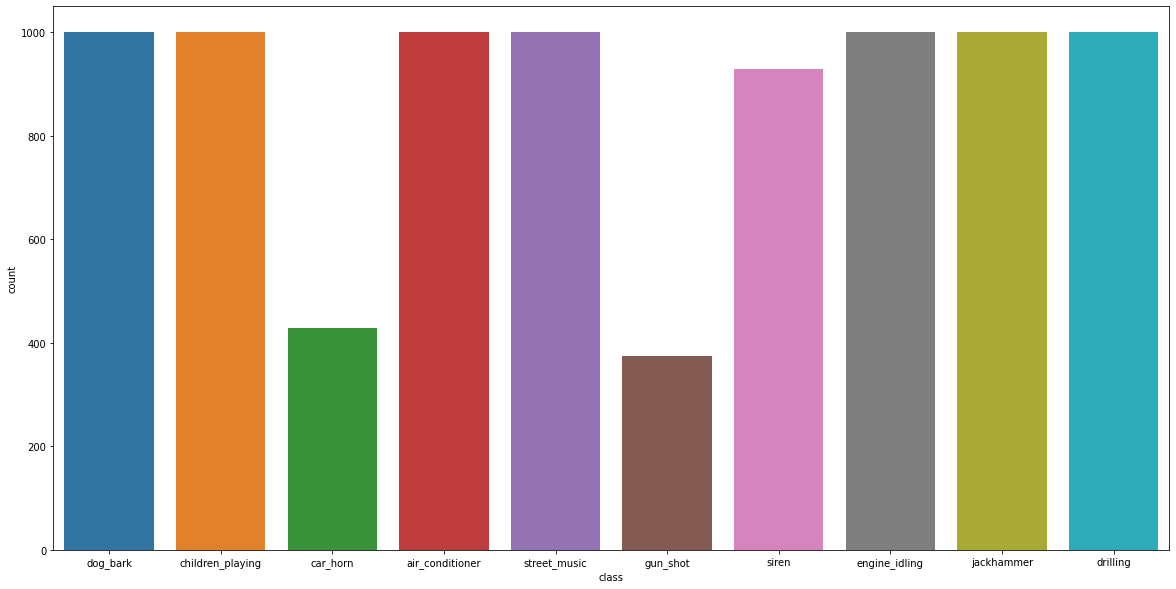

In [57]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(df['class'])

# (E) Model Selection

## Prepare the  data to training pahase

### Data Split

In [71]:
ex_f, t = tidy_data[0]
ex_f, t

(array([-2.1495764e+02,  7.0502464e+01, -1.3070279e+02, -5.3116936e+01,
        -2.1206631e+01, -2.2533747e+01, -1.0577945e+01,  1.8482891e+01,
         6.9706159e+00,  1.4502217e+01, -1.1913271e+01,  2.6082008e+00,
        -1.7720625e+01,  1.0666121e+01, -6.7457919e+00, -4.8134613e-01,
        -1.8599041e+01,  2.0682685e+00, -5.3416796e+00,  8.2313919e+00,
        -1.2759135e+01, -6.5968986e+00,  4.6201234e+00, -2.1799343e+00,
        -6.5518794e+00,  4.9667194e-01, -3.7182662e+00,  5.0266728e+00,
        -6.1611209e+00, -5.0962682e+00,  1.1568884e+00,  7.2418213e+00,
        -1.3256733e-01,  1.7147715e+00, -5.6571107e+00, -2.9742901e+00,
         3.1327231e+00, -1.7985295e+00, -7.5557244e-01,  2.1362242e-01],
       dtype=float32), 'dog_bark')

In [169]:
ex_f.shape

(40,)

In [70]:
# Denoting the features and target variables
total_data = list(zip(*tidy_data))
X = np.array(total_data[0])
y = np.array(total_data[1])

### Data encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
y = np_utils.to_categorical(le.fit_transform(y))

In [ ]:
y.shape, y[0]

((8732, 10), array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

### Saving the encoding configurations

In [ ]:
encodings = {i:cls for i, cls in enumerate(le.classes_)}
encodings

{0: 'air_conditioner',
 1: 'car_horn',
 2: 'children_playing',
 3: 'dog_bark',
 4: 'drilling',
 5: 'engine_idling',
 6: 'gun_shot',
 7: 'jackhammer',
 8: 'siren',
 9: 'street_music'}

In [ ]:
import json
enc_path = "label_encodings.json"
with open(enc_path,"w+") as f: json.dump(encodings, f)

In [ ]:
from google.colab import files
files.download(enc_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Train-Test Split

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### Modelling Via Deep learning

#### Architecture

In [177]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D,MaxPooling2D, Dropout, Activation, Flatten

num_classes = 10

# Input layer
inputs = Input(shape=(40,))

# Block-1
x = Dense(128, activation="relu")(inputs)
x = Dropout(0.5)(x)

# Block-2
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)

# Block-3
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)

# Block-4
x = Dense(128, activation="relu")(x)

# Output layer
outputs = Dense(num_classes, activation="softmax")(x)

# Connecting the model
model = Model(inputs=inputs, outputs=outputs)

In [178]:
# Configurating the model
model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

# Display the architecture
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 40)]              0         
                                                                 
 dense_80 (Dense)            (None, 128)               5248      
                                                                 
 dropout_60 (Dropout)        (None, 128)               0         
                                                                 
 dense_81 (Dense)            (None, 256)               33024     
                                                                 
 dropout_61 (Dropout)        (None, 256)               0         
                                                                 
 dense_82 (Dense)            (None, 256)               65792     
                                                                 
 dropout_62 (Dropout)        (None, 256)               0  

#### Training

In [179]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, LambdaCallback
import numpy as np
import tensorflow as tf

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 5.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

def print_current_lr(epoch, logs):
    print("Learning rate in epoch {} is {}".format(epoch, float(tf.keras.backend.get_value(model.optimizer.lr))))

# Temporary save paths
checkpoint_path = "TemporaryModel_ModelCheckpoint.h5"
tb_log_dir = "./logs"

In [180]:
callbacks = [
    #LearningRateScheduler(step_decay),
    TensorBoard(log_dir=tb_log_dir),
    ModelCheckpoint(filepath= checkpoint_path, save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, verbose=1),
    CSVLogger(filename='training.log'),
    #LambdaCallback(on_epoch_end=print_current_lr)
]

In [181]:
# train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=150, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/150
218/219 [============================>.] - ETA: 0s - loss: 7.2108 - accuracy: 0.1241
Epoch 1: val_loss improved from inf to 2.24771, saving model to TemporaryModel_ModelCheckpoint.h5
219/219 [==============================] - 4s 12ms/step - loss: 7.2045 - accuracy: 0.1240 - val_loss: 2.2477 - val_accuracy: 0.2089
Epoch 2/150
212/219 [============================>.] - ETA: 0s - loss: 2.5274 - accuracy: 0.1638
Epoch 2: val_loss improved from 2.24771 to 2.23275, saving model to TemporaryModel_ModelCheckpoint.h5
219/219 [==============================] - 1s 7ms/step - loss: 2.5237 - accuracy: 0.1623 - val_loss: 2.2327 - val_accuracy: 0.1832
Epoch 3/150
218/219 [============================>.] - ETA: 0s - loss: 2.2342 - accuracy: 0.1915
Epoch 3: val_loss improved from 2.23275 to 2.06658, saving model to TemporaryModel_ModelCheckpoint.h5
219/219 [==============================] - 1s 6ms/step - loss: 2.2337 - accuracy: 0.1916 - val_loss: 2.0666 - val_accuracy: 0.2702
Epoch 4/150
2

### Visualization of the trainign

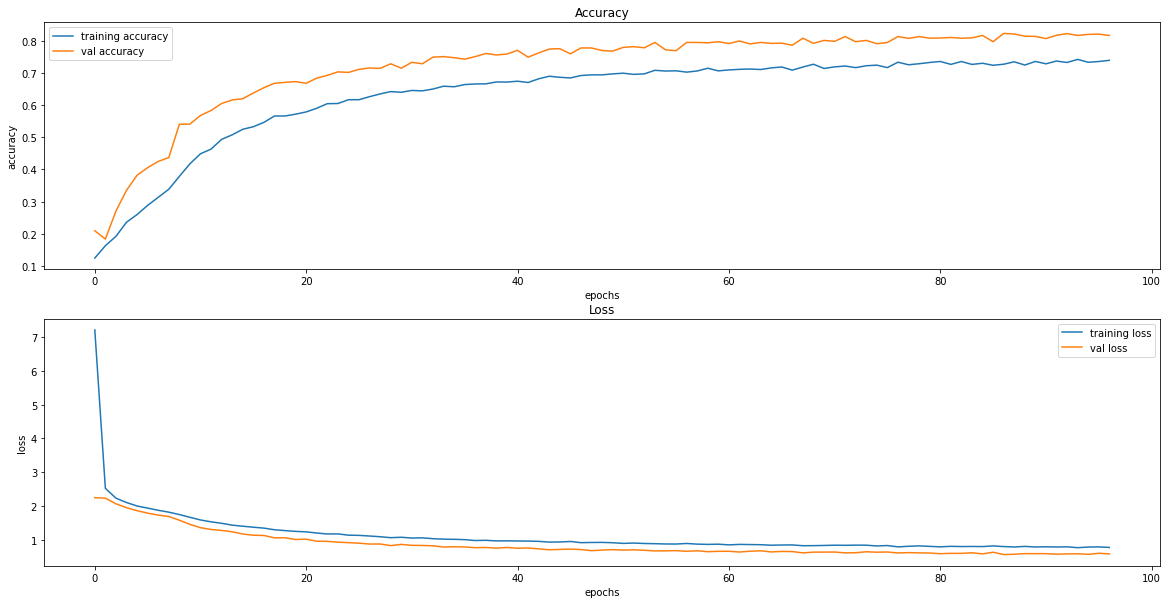

In [182]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


plt.subplot(2,1,2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Save and download the model

### Save the model

In [183]:
# Load the best weights
model.load_weights(checkpoint_path)

# best_model = tf.keras.models.load_model('saved_model/my_model') # best_model_save_path

In [184]:
from datetime import datetime


now = datetime.now().strftime("%m-%d-%Y_%H:%M:%S")
best_model_save_path = f"{model.name}_{now}" 


model.save(best_model_save_path)

### Download the model

In [185]:
dst, src = f"{best_model_save_path}.zip", best_model_save_path

In [186]:
# Zipping the model to download
os.system(f"zip -r {dst} {src}")

0

In [187]:
# Downloading the zipped model into the local
from google.colab import files
files.download(dst)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Creating example Dataset to deployment

In [100]:
ex_audio_dir = "example_audios"
if not os.path.exists(ex_audio_dir): os.mkdir(ex_audio_dir)

In [218]:
examples = {}
for cls in df["class"].unique():
    random_example = np.random.choice(df[df["class"]==cls]["file_path"].index)
    examples[cls] = df["file_path"].iloc[random_example]
examples

{'dog_bark': 'fold10/59513-3-0-0.wav',
 'children_playing': 'fold9/159735-2-0-80.wav',
 'car_horn': 'fold1/176638-1-0-0.wav',
 'air_conditioner': 'fold6/184805-0-0-47.wav',
 'street_music': 'fold6/35548-9-0-10.wav',
 'gun_shot': 'fold1/46656-6-4-0.wav',
 'siren': 'fold6/75490-8-0-2.wav',
 'engine_idling': 'fold9/103249-5-0-13.wav',
 'jackhammer': 'fold5/104998-7-10-10.wav',
 'drilling': 'fold5/50413-4-0-3.wav'}

In [219]:
for name, path in examples.items():
  src, dst = path, os.path.join(ex_audio_dir, f"example_{name}.wav") 
  print(f"{src:<30}{dst:>30}")
  os.system(f"cp -r {src} {dst}")

fold10/59513-3-0-0.wav        example_audios/example_dog_bark.wav
fold9/159735-2-0-80.wav       example_audios/example_children_playing.wav
fold1/176638-1-0-0.wav        example_audios/example_car_horn.wav
fold6/184805-0-0-47.wav       example_audios/example_air_conditioner.wav
fold6/35548-9-0-10.wav        example_audios/example_street_music.wav
fold1/46656-6-4-0.wav         example_audios/example_gun_shot.wav
fold6/75490-8-0-2.wav         example_audios/example_siren.wav
fold9/103249-5-0-13.wav       example_audios/example_engine_idling.wav
fold5/104998-7-10-10.wav      example_audios/example_jackhammer.wav
fold5/50413-4-0-3.wav         example_audios/example_drilling.wav


In [222]:
os.system(f"zip -r {ex_audio_dir}.zip {ex_audio_dir}")

0

In [223]:
from google.colab import files
files.download(f"{ex_audio_dir}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Deployment Web app

In [1]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 KB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 

In [6]:
!unzip audio_clf_model.zip

Archive:  audio_clf_model.zip
   creating: audio_clf_model/
  inflating: audio_clf_model/keras_metadata.pb  
   creating: audio_clf_model/variables/
  inflating: audio_clf_model/variables/variables.index  
  inflating: audio_clf_model/variables/variables.data-00000-of-00001  
   creating: audio_clf_model/assets/
  inflating: audio_clf_model/saved_model.pb  
  inflating: audio_clf_model/fingerprint.pb  


In [7]:
!unzip example_audios.zip

Archive:  example_audios.zip
   creating: example_audios/
  inflating: example_audios/example_drilling.wav  
  inflating: example_audios/example_dog_bark.wav  
  inflating: example_audios/example_air_conditioner.wav  
  inflating: example_audios/example_children_playing.wav  
  inflating: example_audios/example_siren.wav  
  inflating: example_audios/example_street_music.wav  
  inflating: example_audios/example_gun_shot.wav  
  inflating: example_audios/example_car_horn.wav  
  inflating: example_audios/example_jackhammer.wav  
  inflating: example_audios/example_engine_idling.wav  


In [8]:
import tensorflow as tf
import gradio as gr
import librosa
import numpy as np
import time
import json

# setting the file paths
model_path = "audio_clf_model"
encoding_path = "label_encodings.json"
examples_path = "example_audios"

# loading the files
model = tf.keras.models.load_model(model_path)
classes = json.load(open(encoding_path, "r"))
labels = [classes[str(i)] for i in range(len(classes))]

In [9]:
def pre_processor(audio_path):

  # load the audio file
  x, sample_rate = librosa.load(audio_path)
  
  # feature extracting (mfccs is an aduio feature)
  mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)
  feature = mfccs
  
  return feature


def clsf(audio_path):
  
  # extracting the features
  features = pre_processor(audio_path)
  print(len(features))

  # batching the data
  sample = np.expand_dims(features, axis=0)

  # predicting
  preds = model.predict(sample).flatten()
  
  # results
  confidences = {labels[i]: np.round(float(preds[i]), 3) for i in range(len(labels))}

  return confidences

In [10]:
dog_bark_path = f"{examples_path}/example_dog_bark.wav"
clsf(dog_bark_path)

40
1/1 [==============================] - 0s 339ms/step


{'air_conditioner': 0.0,
 'car_horn': 0.0,
 'children_playing': 0.0,
 'dog_bark': 0.99,
 'drilling': 0.0,
 'engine_idling': 0.0,
 'gun_shot': 0.009,
 'jackhammer': 0.0,
 'siren': 0.0,
 'street_music': 0.001}

In [11]:
gr.Interface(
    fn=clsf, 
    inputs=gr.Audio(source="upload", type="filepath"),
    outputs = "label",
    #live=True,
    examples = examples_path
    ).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>